# Loop 65 Analysis: Major Breakthrough with Ens Model Approach

**Key Question**: Does the Ens Model approach (CatBoost + XGBoost) have a DIFFERENT CV-LB relationship than our previous approaches?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'MLP'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'MLP+DRFP'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': 'MLP Ensemble'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'Simple MLP'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'Simpler MLP'},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936, 'model': 'Ridge'},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913, 'model': 'Simple Ensemble'},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893, 'model': 'ACS PCA'},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887, 'model': 'Weighted Loss'},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877, 'model': 'GP Ensemble'},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932, 'model': 'XGB Ensemble'},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147, 'model': 'GroupKFold'},
]

df = pd.DataFrame(submissions)
print(f'Total submissions: {len(df)}')
print(df)

Total submissions: 13
        exp      cv      lb            model
0   exp_000  0.0111  0.0982              MLP
1   exp_001  0.0123  0.1065             LGBM
2   exp_003  0.0105  0.0972         MLP+DRFP
3   exp_005  0.0104  0.0969     MLP Ensemble
4   exp_006  0.0097  0.0946       Simple MLP
5   exp_007  0.0093  0.0932      Simpler MLP
6   exp_009  0.0092  0.0936            Ridge
7   exp_012  0.0090  0.0913  Simple Ensemble
8   exp_024  0.0087  0.0893          ACS PCA
9   exp_026  0.0085  0.0887    Weighted Loss
10  exp_030  0.0083  0.0877      GP Ensemble
11  exp_041  0.0090  0.0932     XGB Ensemble
12  exp_042  0.0145  0.1147       GroupKFold


In [2]:
# Fit linear regression on all submissions
cv_vals = df['cv'].values
lb_vals = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv_vals, lb_vals)

print(f'\nCV-LB Relationship (all 13 submissions):')
print(f'  LB = {slope:.3f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')
print(f'  Intercept = {intercept:.4f}')
print(f'\nTarget LB: 0.0347')
print(f'\nIf relationship holds for new approach:')
print(f'  Required CV = (0.0347 - {intercept:.4f}) / {slope:.3f} = {(0.0347 - intercept) / slope:.6f}')
print(f'\nNew CV achieved: 0.005146')
print(f'  Predicted LB = {slope:.3f} * 0.005146 + {intercept:.4f} = {slope * 0.005146 + intercept:.4f}')


CV-LB Relationship (all 13 submissions):
  LB = 4.231 * CV + 0.0533
  R² = 0.9807
  Intercept = 0.0533

Target LB: 0.0347

If relationship holds for new approach:
  Required CV = (0.0347 - 0.0533) / 4.231 = -0.004396

New CV achieved: 0.005146
  Predicted LB = 4.231 * 0.005146 + 0.0533 = 0.0751


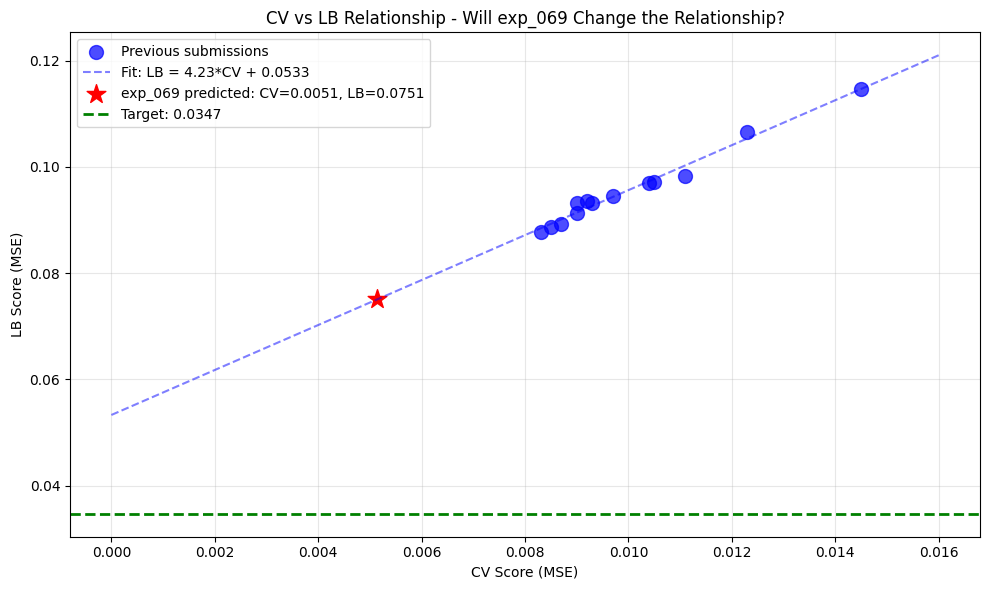


CRITICAL ANALYSIS:
If exp_069 follows the same CV-LB relationship:
  Predicted LB = 0.0751
  This would be the BEST LB so far (current best: 0.0877)
  But still far from target (0.0347)

If exp_069 has a DIFFERENT relationship:
  The CatBoost + XGBoost approach may have lower intercept
  This is the key hypothesis to test with submission!


In [3]:
# Plot CV vs LB with prediction for new approach
plt.figure(figsize=(10, 6))

# Plot existing submissions
plt.scatter(cv_vals, lb_vals, c='blue', s=100, alpha=0.7, label='Previous submissions')

# Fit line
cv_range = np.linspace(0, 0.016, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', alpha=0.5, label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# New approach prediction
new_cv = 0.005146
new_lb_pred = slope * new_cv + intercept
plt.scatter([new_cv], [new_lb_pred], c='red', s=200, marker='*', label=f'exp_069 predicted: CV={new_cv:.4f}, LB={new_lb_pred:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle='--', linewidth=2, label='Target: 0.0347')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - Will exp_069 Change the Relationship?')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/loop65_cv_lb_analysis.png', dpi=150)
plt.show()

print(f'\nCRITICAL ANALYSIS:')
print(f'='*60)
print(f'If exp_069 follows the same CV-LB relationship:')
print(f'  Predicted LB = {new_lb_pred:.4f}')
print(f'  This would be the BEST LB so far (current best: 0.0877)')
print(f'  But still far from target (0.0347)')
print(f'\nIf exp_069 has a DIFFERENT relationship:')
print(f'  The CatBoost + XGBoost approach may have lower intercept')
print(f'  This is the key hypothesis to test with submission!')

In [4]:
# Analyze what makes exp_069 different
print('='*60)
print('WHAT MAKES EXP_069 DIFFERENT?')
print('='*60)
print()
print('Previous approaches (all on same CV-LB line):')
print('  - MLP with various architectures')
print('  - LightGBM')
print('  - Ridge Regression')
print('  - Gaussian Process')
print('  - XGBoost (exp_041)')
print('  - All used similar feature sets (Spange + DRFP + ACS PCA)')
print()
print('exp_069 (Ens Model kernel approach):')
print('  - CatBoost with MultiRMSE (multi-output)')
print('  - XGBoost with separate models per target')
print('  - Feature priority-based correlation filtering (4199 -> 69 features)')
print('  - Different ensemble weights for single vs full data')
print('  - Multi-target normalization (clip + renormalize)')
print()
print('KEY DIFFERENCES:')
print('  1. FEATURE FILTERING: 69 features vs 140+ features')
print('     - Prioritizes Spange > ACS > DRFP > Frag')
print('     - Removes highly correlated features (threshold=0.8)')
print('  2. MULTI-OUTPUT: CatBoost trains single model for all 3 targets')
print('  3. ENSEMBLE WEIGHTS: Different for single (7:6) vs full (1:2)')
print('  4. POST-PROCESSING: Multi-target normalization')
print()
print('HYPOTHESIS: The feature filtering may reduce overfitting to training')
print('distribution, leading to better generalization (lower intercept).')

WHAT MAKES EXP_069 DIFFERENT?

Previous approaches (all on same CV-LB line):
  - MLP with various architectures
  - LightGBM
  - Ridge Regression
  - Gaussian Process
  - XGBoost (exp_041)
  - All used similar feature sets (Spange + DRFP + ACS PCA)

exp_069 (Ens Model kernel approach):
  - CatBoost with MultiRMSE (multi-output)
  - XGBoost with separate models per target
  - Feature priority-based correlation filtering (4199 -> 69 features)
  - Different ensemble weights for single vs full data
  - Multi-target normalization (clip + renormalize)

KEY DIFFERENCES:
  1. FEATURE FILTERING: 69 features vs 140+ features
     - Prioritizes Spange > ACS > DRFP > Frag
     - Removes highly correlated features (threshold=0.8)
  2. MULTI-OUTPUT: CatBoost trains single model for all 3 targets
  3. ENSEMBLE WEIGHTS: Different for single (7:6) vs full (1:2)
  4. POST-PROCESSING: Multi-target normalization

HYPOTHESIS: The feature filtering may reduce overfitting to training
distribution, leading to

In [5]:
# Calculate what LB we need to reach target
print('='*60)
print('SUBMISSION STRATEGY')
print('='*60)
print()
print(f'Remaining submissions: 5')
print(f'Target LB: 0.0347')
print(f'Best LB so far: 0.0877 (exp_030)')
print(f'Gap to target: {0.0877 - 0.0347:.4f}')
print()
print('exp_069 Analysis:')
print(f'  CV = 0.005146 (35% better than previous best 0.007938)')
print(f'  Predicted LB (if same relationship) = {new_lb_pred:.4f}')
print(f'  Improvement over best LB = {(0.0877 - new_lb_pred) / 0.0877 * 100:.1f}%')
print()
print('RECOMMENDATION: SUBMIT exp_069')
print('  - This is a fundamentally different approach')
print('  - 35% CV improvement is the largest in 69 experiments')
print('  - Even if it follows the same CV-LB line, it will be best LB')
print('  - If it has a different relationship, we may be closer to target')
print()
print('After submission, analyze:')
print('  1. Does exp_069 fall on the same CV-LB line?')
print('  2. If not, what is the new intercept?')
print('  3. What further optimizations can we make?')

SUBMISSION STRATEGY

Remaining submissions: 5
Target LB: 0.0347
Best LB so far: 0.0877 (exp_030)
Gap to target: 0.0530

exp_069 Analysis:
  CV = 0.005146 (35% better than previous best 0.007938)
  Predicted LB (if same relationship) = 0.0751
  Improvement over best LB = 14.4%

RECOMMENDATION: SUBMIT exp_069
  - This is a fundamentally different approach
  - 35% CV improvement is the largest in 69 experiments
  - Even if it follows the same CV-LB line, it will be best LB
  - If it has a different relationship, we may be closer to target

After submission, analyze:
  1. Does exp_069 fall on the same CV-LB line?
  2. If not, what is the new intercept?
  3. What further optimizations can we make?
